In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [9]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Distribution of age')

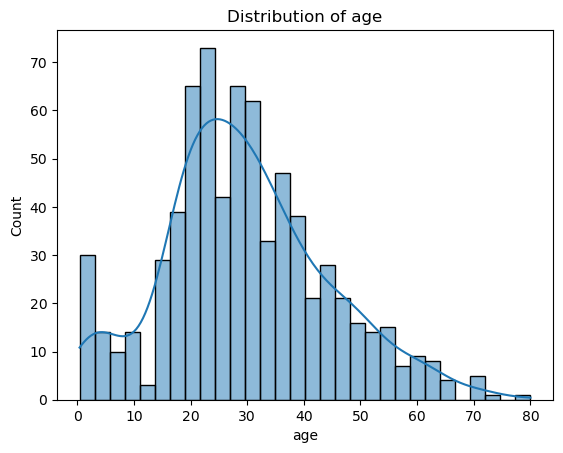

In [21]:
sns.histplot(df['age'],kde=True, bins=30)
plt.title('Distribution of age')


Text(0.5, 1.0, 'Boxplot of age')

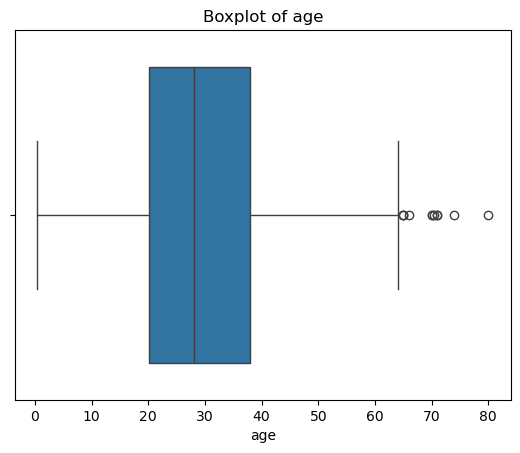

In [23]:
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')


           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


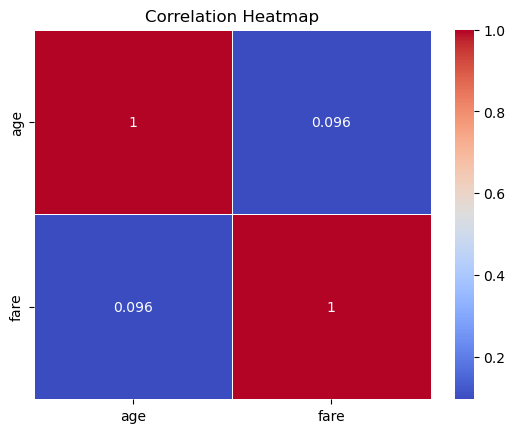

In [25]:
# Pearson Correlation between Age and Fare
correlation = df[['age', 'fare']].corr(method='pearson')
print(correlation)

# Visualizing the correlation with a heatmap
sns.heatmap(df[['age', 'fare']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [27]:
# T-test: Comparing the average age of survivors vs non-survivors
survived = df[df['survived'] == 1]['age'].dropna()
not_survived = df[df['survived'] == 0]['age'].dropna()

t_stat, p_value = stats.ttest_ind(survived, not_survived)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -2.06668694625381, P-value: 0.03912465401348249


In [33]:
from sklearn.linear_model import LinearRegression

# Preparing the data
X = df[['age']].dropna()  # Independent variable
y = df['fare'].dropna()   # Dependent variable

# Linear Regression Model
reg = LinearRegression()
reg.fit(X, y)

# Predictions
predictions = reg.predict(X)

# Plotting the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red')
plt.title('Linear Regression: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

print(f"Intercept: {reg.intercept_}, Slope: {reg.coef_[0]}")


ValueError: Found input variables with inconsistent numbers of samples: [714, 891]